In [4]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [5]:
sql = """select
id,
name,
artist,
cast(substr(rel_date,0,5) as int) as rel_year,
case when (substr(rel_date,0,5) < '1910') then '1900s'
	when (substr(rel_date,0,5) >= '1910' and substr(rel_date,0,5) < '1920') then 1910
	when (substr(rel_date,0,5) >= '1920' and substr(rel_date,0,5) < '1930') then 1920
	when (substr(rel_date,0,5) >= '1930' and substr(rel_date,0,5) < '1940') then 1930
	when (substr(rel_date,0,5) >= '1940' and substr(rel_date,0,5) < '1950') then 1940
	when (substr(rel_date,0,5) >= '1950' and substr(rel_date,0,5) < '1960') then 1950
	when (substr(rel_date,0,5) >= '1960' and substr(rel_date,0,5) < '1970') then 1960
	when (substr(rel_date,0,5) >= '1970' and substr(rel_date,0,5) < '1980') then 1970
	when (substr(rel_date,0,5) >= '1980' and substr(rel_date,0,5) < '1990') then 1980
	when (substr(rel_date,0,5) >= '1990' and substr(rel_date,0,5) < '2000') then 1990
	when (substr(rel_date,0,5) >= '2000' and substr(rel_date,0,5) < '2010') then 2000
	when (substr(rel_date,0,5) >= '2010' and substr(rel_date,0,5) < '2020') then 2010
	end dateClass,
explicit,
case when (explicit = 0) then 'clean'
	when (explicit = 1) then 'explicit'
	end explicitClass,
time_signature,
key,
tempo,
case when (tempo <= 50) then 'very slow'
	when (tempo > 50 and tempo <= 100) then 'slow'
	when (tempo > 100 and tempo <= 150) then 'moderate'
	when (tempo > 150 and tempo <= 200) then 'fast'
	when (tempo > 200 and tempo <= 250) then 'very fast'
	end tempoClass,
mode,
case when (mode = 0) then 'minor'
	when (mode = 1) then 'major'
	end modeClass,
duration_ms,
case when (duration_ms <= 120000) then 'very short'
	when (duration_ms > 120000 and duration_ms <= 180000) then 'short'
	when (duration_ms > 180000 and duration_ms <= 240000) then 'medium'
	when (duration_ms > 240000 and duration_ms <= 300000) then 'long'
	when (duration_ms > 300000) then 'very long'
	end durationClass,
danceability,
case when (danceability <= 0.25) then 'low danceability'
	when (danceability > 0.25 and danceability <= 0.50) then 'low/moderate danceability'
	when (danceability > 0.50 and danceability <= 0.75) then 'moderate/high danceability'
	when (danceability > 0.75) then 'high danceability'
	end danceabilityClass,
valence,
case when (valence <= 0.25) then 'low valence'
	when (valence > 0.25 and valence <= 0.50) then 'low/moderate valence'
	when (valence > 0.50 and valence <= 0.75) then 'moderate/high valence'
	when (valence > 0.75) then 'high valence'
	end valenceClass,
energy,
case when (energy <= 0.25) then 'low energy'
	when (energy > 0.25 and energy <= 0.50) then 'low/moderate energy'
	when (energy > 0.50 and energy <= 0.75) then 'moderate/high energy'
	when (energy > 0.75) then 'high energy'
	end energyClass,
loudness,
case when (loudness < -45 ) then 'very quiet'
	when (loudness > -45 and loudness <= -30) then 'quiet'
	when (loudness > -30 and loudness <= -15) then 'moderate'
	when (loudness > -15 and loudness <= 0) then 'loud'
	when (loudness > 0 and loudness <= 15) then 'very loud'
	end loudnessClass,
speechiness,
case when (speechiness <= 0.33) then 'just music'
	when (speechiness > 0.33 and speechiness <= 0.66) then 'both music and speech'
	when (speechiness > 0.66) then 'just speech'
	end speechinessClass,
acousticness,
case when (acousticness <= 0.25) then 'low acousticness'
	when (acousticness > 0.25 and acousticness <= 0.50) then 'low/moderate acousticness'
	when (acousticness > 0.50 and acousticness <= 0.75) then 'moderate/high acousticness'
	when (acousticness > 0.75) then 'high acousticness'
	end acousticnessClass,
instrumentalness,
case when (instrumentalness <= 0.25) then 'less instrumental'
	when (instrumentalness > 0.25 and instrumentalness <= 0.75) then 'moderate instrumentalness'
	when (instrumentalness > 0.75) then 'more instrumental'
	end instrumentalnessClass,
liveness,
case when (liveness <= 0.33) then 'studio recording'
	when (liveness > 0.33 and liveness <= 0.66) then 'moderate liveness'
	when (acousticness > 0.66) then 'live recording'
	end acousticnessClass
from song_analysis
where
key is not null
and tempo is not null
and mode is not null
and duration_ms is not null
and danceability is not null
and valence is not null
and energy is not null
and loudness is not null
and speechiness is not null
and instrumentalness is not null
and substr(rel_date,0,5) >= '1899'
and tempo != 0.0
and time_signature != 0
and liveness is not null
and duration_ms >= 60000;"""

In [6]:
conn = sqlite3.connect('spotify_song_data.db')
c = conn.cursor()

dfSpotify = pd.read_sql_query(sql, conn)
dfSpotify = dfSpotify.dropna()
conn.close()

# cut-off date of 1950 is used due to a few errors in the dates of some songs
# Needs some fixing
#dfSpotify = dfSpotify.loc[dfSpotify.rel_year > 1950]
dfSpotify.head()

,id,name,artist,rel_year,dateClass,explicit,explicitClass,time_signature,key,tempo,...,loudness,loudnessClass,speechiness,speechinessClass,acousticness,acousticnessClass,instrumentalness,instrumentalnessClass,liveness,acousticnessClass
0,6nNED0S6N5oWBmpdM7VCnE,Calling,Groovecatcher,2006,2000,0,clean,4,9,80.016,...,-7.305,loud,0.0323,just music,0.00945,low acousticness,0.019500,less instrumental,0.1270,studio recording
1,4oWaq1NqE5K3HKCTQhJTnr,Athina-Saloniki me mia papoutsothiki,Imiskoubria,2008,2000,0,clean,4,7,96.006,...,-8.657,loud,0.1920,just music,0.03480,low acousticness,0.000000,less instrumental,0.0748,studio recording
2,1Yhg8pkTNyzn9lQPUSHed1,Sing The Absurd,The Wonder Stuff,1993,1990,0,clean,3,7,83.180,...,-9.729,loud,0.0335,just music,0.00169,low acousticness,0.000011,less instrumental,0.0757,studio recording
4,1p8fQJTQnmSBt5SItyV2Vb,Carolina Moon - Remastered 2013,Thelonious Monk,2014,2010,0,clean,3,2,92.463,...,-8.439,loud,0.0324,just music,0.62200,moderate/high acousticness,0.053500,less instrumental,0.1110,studio recording
5,57ttB1s87EOU6BO27OznZN,Can You Dig It?,Roy Ayers,2009,2000,0,clean,4,1,146.916,...,-13.656,loud,0.0286,just music,0.21100,low acousticness,0.319000,moderate instrumentalness,0.1170,studio recording


In [11]:
# Correlation coefficients for all attributes
dfSpotify.corr()

,explicit,time_signature,key,tempo,mode,duration_ms,danceability,valence,energy,loudness,speechiness,acousticness,instrumentalness,liveness
explicit,1.000000,0.029869,0.011755,-0.038991,-0.031416,-0.033725,0.097651,0.032127,0.107269,0.110334,0.297932,-0.106828,-0.087754,0.054939
time_signature,0.029869,1.000000,0.012376,0.000866,-0.015102,0.007920,0.159304,0.133171,0.173643,0.131519,0.001108,-0.168457,-0.024673,-0.012419
key,0.011755,0.012376,1.000000,0.001521,-0.179656,0.008530,0.024873,0.021047,0.038888,0.022167,0.023907,-0.035543,0.002384,-0.005989
tempo,-0.038991,0.000866,0.001521,1.000000,0.011466,-0.007246,-0.100302,0.094192,0.223388,0.165042,-0.030626,-0.188853,0.006910,-0.004229
mode,-0.031416,-0.015102,-0.179656,0.011466,1.000000,-0.073923,-0.048460,0.023242,-0.046097,-0.009267,-0.041998,0.056528,-0.067659,0.009610
duration_ms,-0.033725,0.007920,0.008530,-0.007246,-0.073923,1.000000,-0.013189,-0.196296,-0.011353,-0.081106,-0.030001,-0.074097,0.212189,-0.026807
danceability,0.097651,0.159304,0.024873,-0.100302,-0.048460,-0.013189,1.000000,0.518535,0.065534,0.115265,0.141924,-0.122490,-0.114809,-0.112565
valence,0.032127,0.133171,0.021047,0.094192,0.023242,-0.196296,0.518535,1.000000,0.274916,0.241929,0.055793,-0.152633,-0.236015,-0.009881
energy,0.107269,0.173643,0.038888,0.223388,-0.046097,-0.011353,0.065534,0.274916,1.000000,0.764906,0.111876,-0.719655,-0.077260,0.113728
loudness,0.110334,0.131519,0.022167,0.165042,-0.009267,-0.081106,0.115265,0.241929,0.764906,1.000000,0.032282,-0.559988,-0.282445,0.053541


In [27]:
from scipy import stats

def avg_attr_over_years(attr_name):
    #takes the average for each year and returns a list of tuples (year, average of trait)
    #assert(type(dfSpotify[attr]) in [int, float, complex])
    
    years = list(set(dfSpotify.rel_year.values))

    attr_list = list()
    
    for yr in years:
        dfYr = dfSpotify.loc[dfSpotify.rel_year == yr]
        
        attr_list.append((yr, dfYr[attr_name].mean()))
    
    return attr_list

# print(type(dfSpotify['valence'][1]))
def plotTemporalTraits(traits):
    #takes a list of traits and plots them on a single graph.
    
    #create lists for all traits
    temp_traits = []
    for t in traits:
        temp_traits.append(avg_attr_over_years(t))
    
    fig, ax = plt.subplots(1,1, figsize=(10,6))
    index = 0
    #plot each trait vs year
    for x in temp_traits:
        yrs = [t[0] for t in x]
        trait = [t[1] for t in x]
        ax.scatter(yrs, trait, alpha = 0.6, label = traits[index])
        index = index + 1;
    plt.legend()
    ax.set_xlabel("Year")
    ax.set_ylabel("Trait Value")
    
def plotTemporalTraitRegression(trait_name):
    
    trait_vs_year = avg_attr_over_years(trait_name)
    
    fig, ax = plt.subplots(1,1, figsize=(10,6))
    index = 0
    
    yrs = [t[0] for t in trait_vs_year]
    trait = [t[1] for t in trait_vs_year]
    
    ax.scatter(yrs, trait, alpha = 0.6, label = trait_name)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(yrs, trait)
    
    x_vals = np.arange(yrs[0],yrs[-1])
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label='SLR', color='coral')
    
    plt.legend()
    ax.set_xlabel("Year")
    ax.set_ylabel("Trait Average")
    

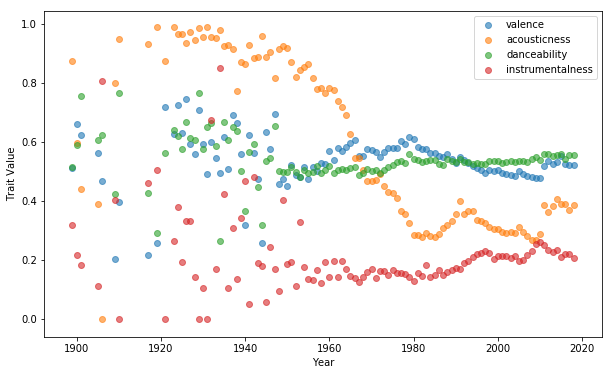

In [28]:
# This graph shows issue with scale of different attributes on the same plot
plotTemporalTraits(['valence', 'acousticness', 'danceability', 'instrumentalness'])

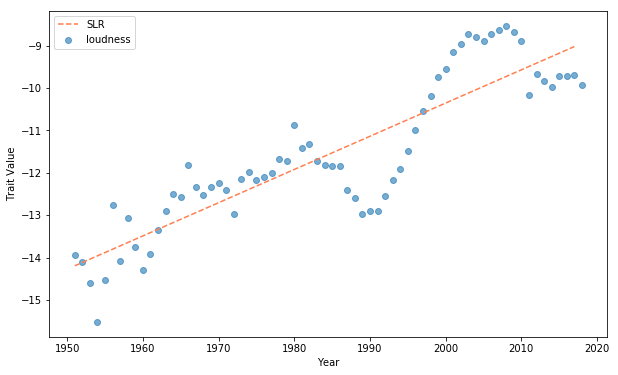

In [27]:
plotTemporalTraitRegression('loudness')

In [21]:
def histogramOverYears(attr_name, startYear, endYear, viewHeight, viewRotation):
    assert startYear <= endYear
    assert viewRotation <= 360
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    nbins = 50
    years = list(range(startYear, endYear + 1))
    cmap = plt.cm.get_cmap("hsv", len(years))
    c = 0
    for year in years:
        dfdata = dfSpotify.loc[dfSpotify.rel_year == year]
        if (dfdata.empty):
            break
        data = dfdata[attr_name].tolist()
        hist, bins = np.histogram(data, bins=nbins, normed = True)
        xs = (bins[:-1] + bins[1:])/2
        ax.bar(xs, hist, zs=year, zdir='y', color=cmap(c), ec=cmap(c), alpha=0.5)
        c += 1
    
    #sets year ticks. If every 5 is too crowded then do every 10
    n = len(years)
    howFrequent = 5
    if ((n / howFrequent) > 8):
        howFrequent = 10
    yearTicks = years[0::howFrequent]
    
    
    ax.set_title("Density histogram over time")
    ax.set_xlabel(attr_name)
    ax.set_ylabel("Year")
    ax.set_zlabel("Density")
    ax.set_yticks(yearTicks)
    
    ax.view_init(viewHeight, viewRotation)

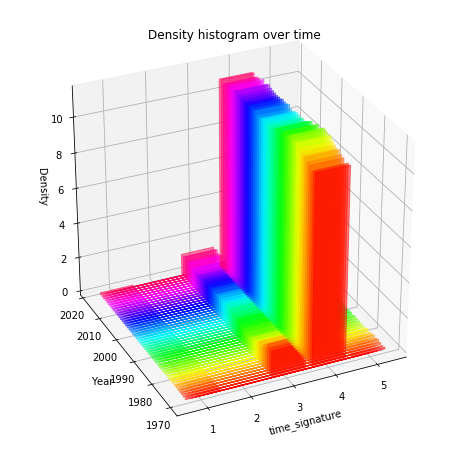

In [36]:
histogramOverYears("time_signature", 1970, 2020, 30, 245)

Text(0.5,1,'Number of Songs per Year in Dataset')

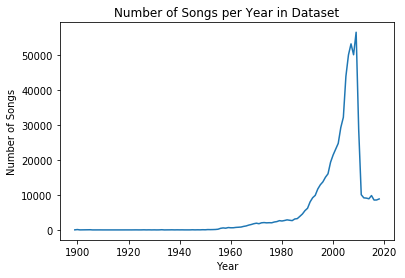

In [29]:
#Plotting how many songs there are for each year in the data

sql2 = '''select 
distinct
count(id) as count,
cast(substr(rel_date,0,5) as int) as year
from song_analysis
where
key is not null
and tempo is not null
and mode is not null
and duration_ms is not null
and danceability is not null
and valence is not null
and energy is not null
and loudness is not null
and speechiness is not null
and instrumentalness is not null
and substr(rel_date,0,5) >= '1899'
and tempo != 0.0
and time_signature != 0
and liveness is not null
and duration_ms >= 60000
group by cast(substr(rel_date,0,5) as int);
'''

conn = sqlite3.connect('spotify_song_data.db')
c = conn.cursor()

dfYearCount = pd.read_sql_query(sql2, conn)
dfYearCount = dfYearCount.dropna()
conn.close()

fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(dfYearCount["year"], dfYearCount["count"])
ax.set_xlabel("Year")
ax.set_ylabel("Number of Songs")
ax.set_title("Number of Songs per Year in Dataset")